In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [13]:
df= pd.read_csv('Company_data.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
df.shape

(200, 4)

In [15]:
scaler=MinMaxScaler()
scale=scaler.fit_transform(df[['Newspaper','Sales']])
df_scale = pd.DataFrame(scale, columns = ['Newspaper','Sales']);
df_scale.head()

,Newspaper,Sales
0,0.605981,0.807087
1,0.394019,0.346457
2,0.606860,0.409449
3,0.511873,0.586614
4,0.510994,0.641732


In [16]:
kmeans=KMeans(n_clusters=2)
y_predicted=kmeans.fit_predict(df_scale[['Newspaper','Sales']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0], dtype=int32)

In [17]:
kmeans.cluster_centers_

array([[0.30448549, 0.68901217],
       [0.21915372, 0.34164479]])

<Axes: xlabel='Newspaper', ylabel='Sales'>

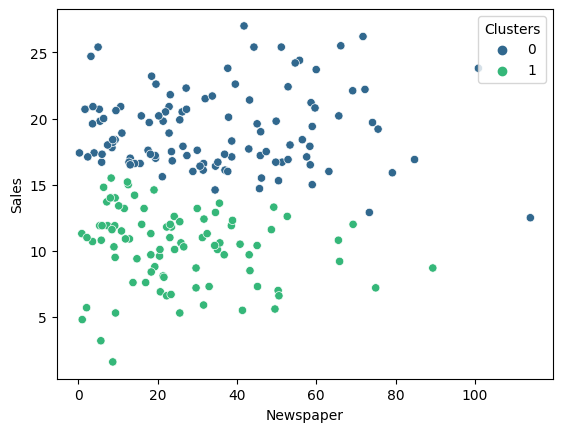

In [18]:
df['Clusters'] = kmeans.labels_
sn.scatterplot(x="Newspaper", y="Sales",hue = 'Clusters',  data=df,palette='viridis')

In [22]:
k=range(2,12)
wss=[]
for i in k:
  kmeans=cluster.KMeans(n_clusters=i)
  kmeans=kmeans.fit(df_scale)
  wss_iter=kmeans.inertia_
  wss.append(wss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

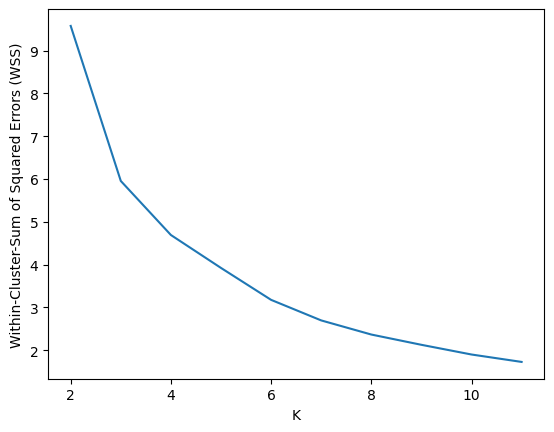

In [24]:

plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(k,wss)

In [27]:
km=KMeans(n_clusters=5)
y_predicted = km.fit_predict(df_scale[['Newspaper','Sales']])
y_predicted
     

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 4, 3, 3, 4, 1, 1, 1, 2, 1, 2, 4, 1, 3, 0, 4, 0, 1, 2, 3, 2,
       4, 2, 1, 2, 2, 2, 2, 4, 0, 3, 1, 2, 1, 2, 2, 3, 1, 2, 3, 3, 2, 2,
       4, 3, 1, 2, 0, 1, 3, 1, 0, 0, 2, 0, 4, 1, 0, 2, 1, 0, 2, 1, 3, 1,
       1, 1, 2, 2, 3, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 3, 1, 3, 2, 0, 1, 3,
       4, 3, 1, 1, 0, 0, 1, 3, 2, 2, 0, 3, 3, 0, 2, 2, 2, 3, 1, 1, 1, 2,
       3, 2, 2, 2, 3, 4, 1, 1, 3, 1, 3, 4, 2, 2, 0, 1, 4, 1, 2, 4, 1, 3,
       1, 3, 4, 1, 1, 0, 1, 2, 1, 0, 3, 1, 3, 1, 2, 0, 1, 1, 3, 4, 2, 3,
       2, 1, 3, 1, 4, 3, 3, 3, 2, 2, 1, 0, 1, 2, 3, 2, 1, 3, 1, 2, 2, 0,
       2, 3, 2, 2, 2, 2, 1, 0, 3, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       0, 2], dtype=int32)

<Axes: xlabel='Sales', ylabel='Newspaper'>

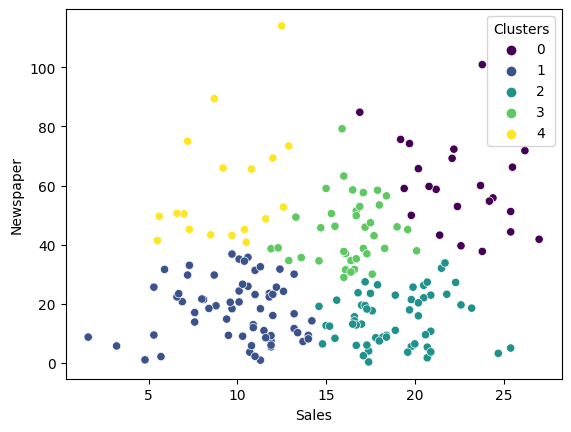

In [29]:
df['Clusters'] = km.labels_

sn.scatterplot(x="Sales", y="Newspaper",hue = 'Clusters',  data=df,palette='viridis')